In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed, randrange

sns.set_theme(palette="bright")

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc("legend", fontsize=20)

In [2]:
claims = []
claim_folder = os.path.join("data","gridCalc")
for filename in os.listdir(claim_folder):
    if filename.endswith(".csv"):
        filename = os.path.join(claim_folder, filename)
        claims.append(pd.read_csv(filename))

df = pd.concat(claims)
df

df["diff"] = df.weightedAfterAlgorithm - df.weighted

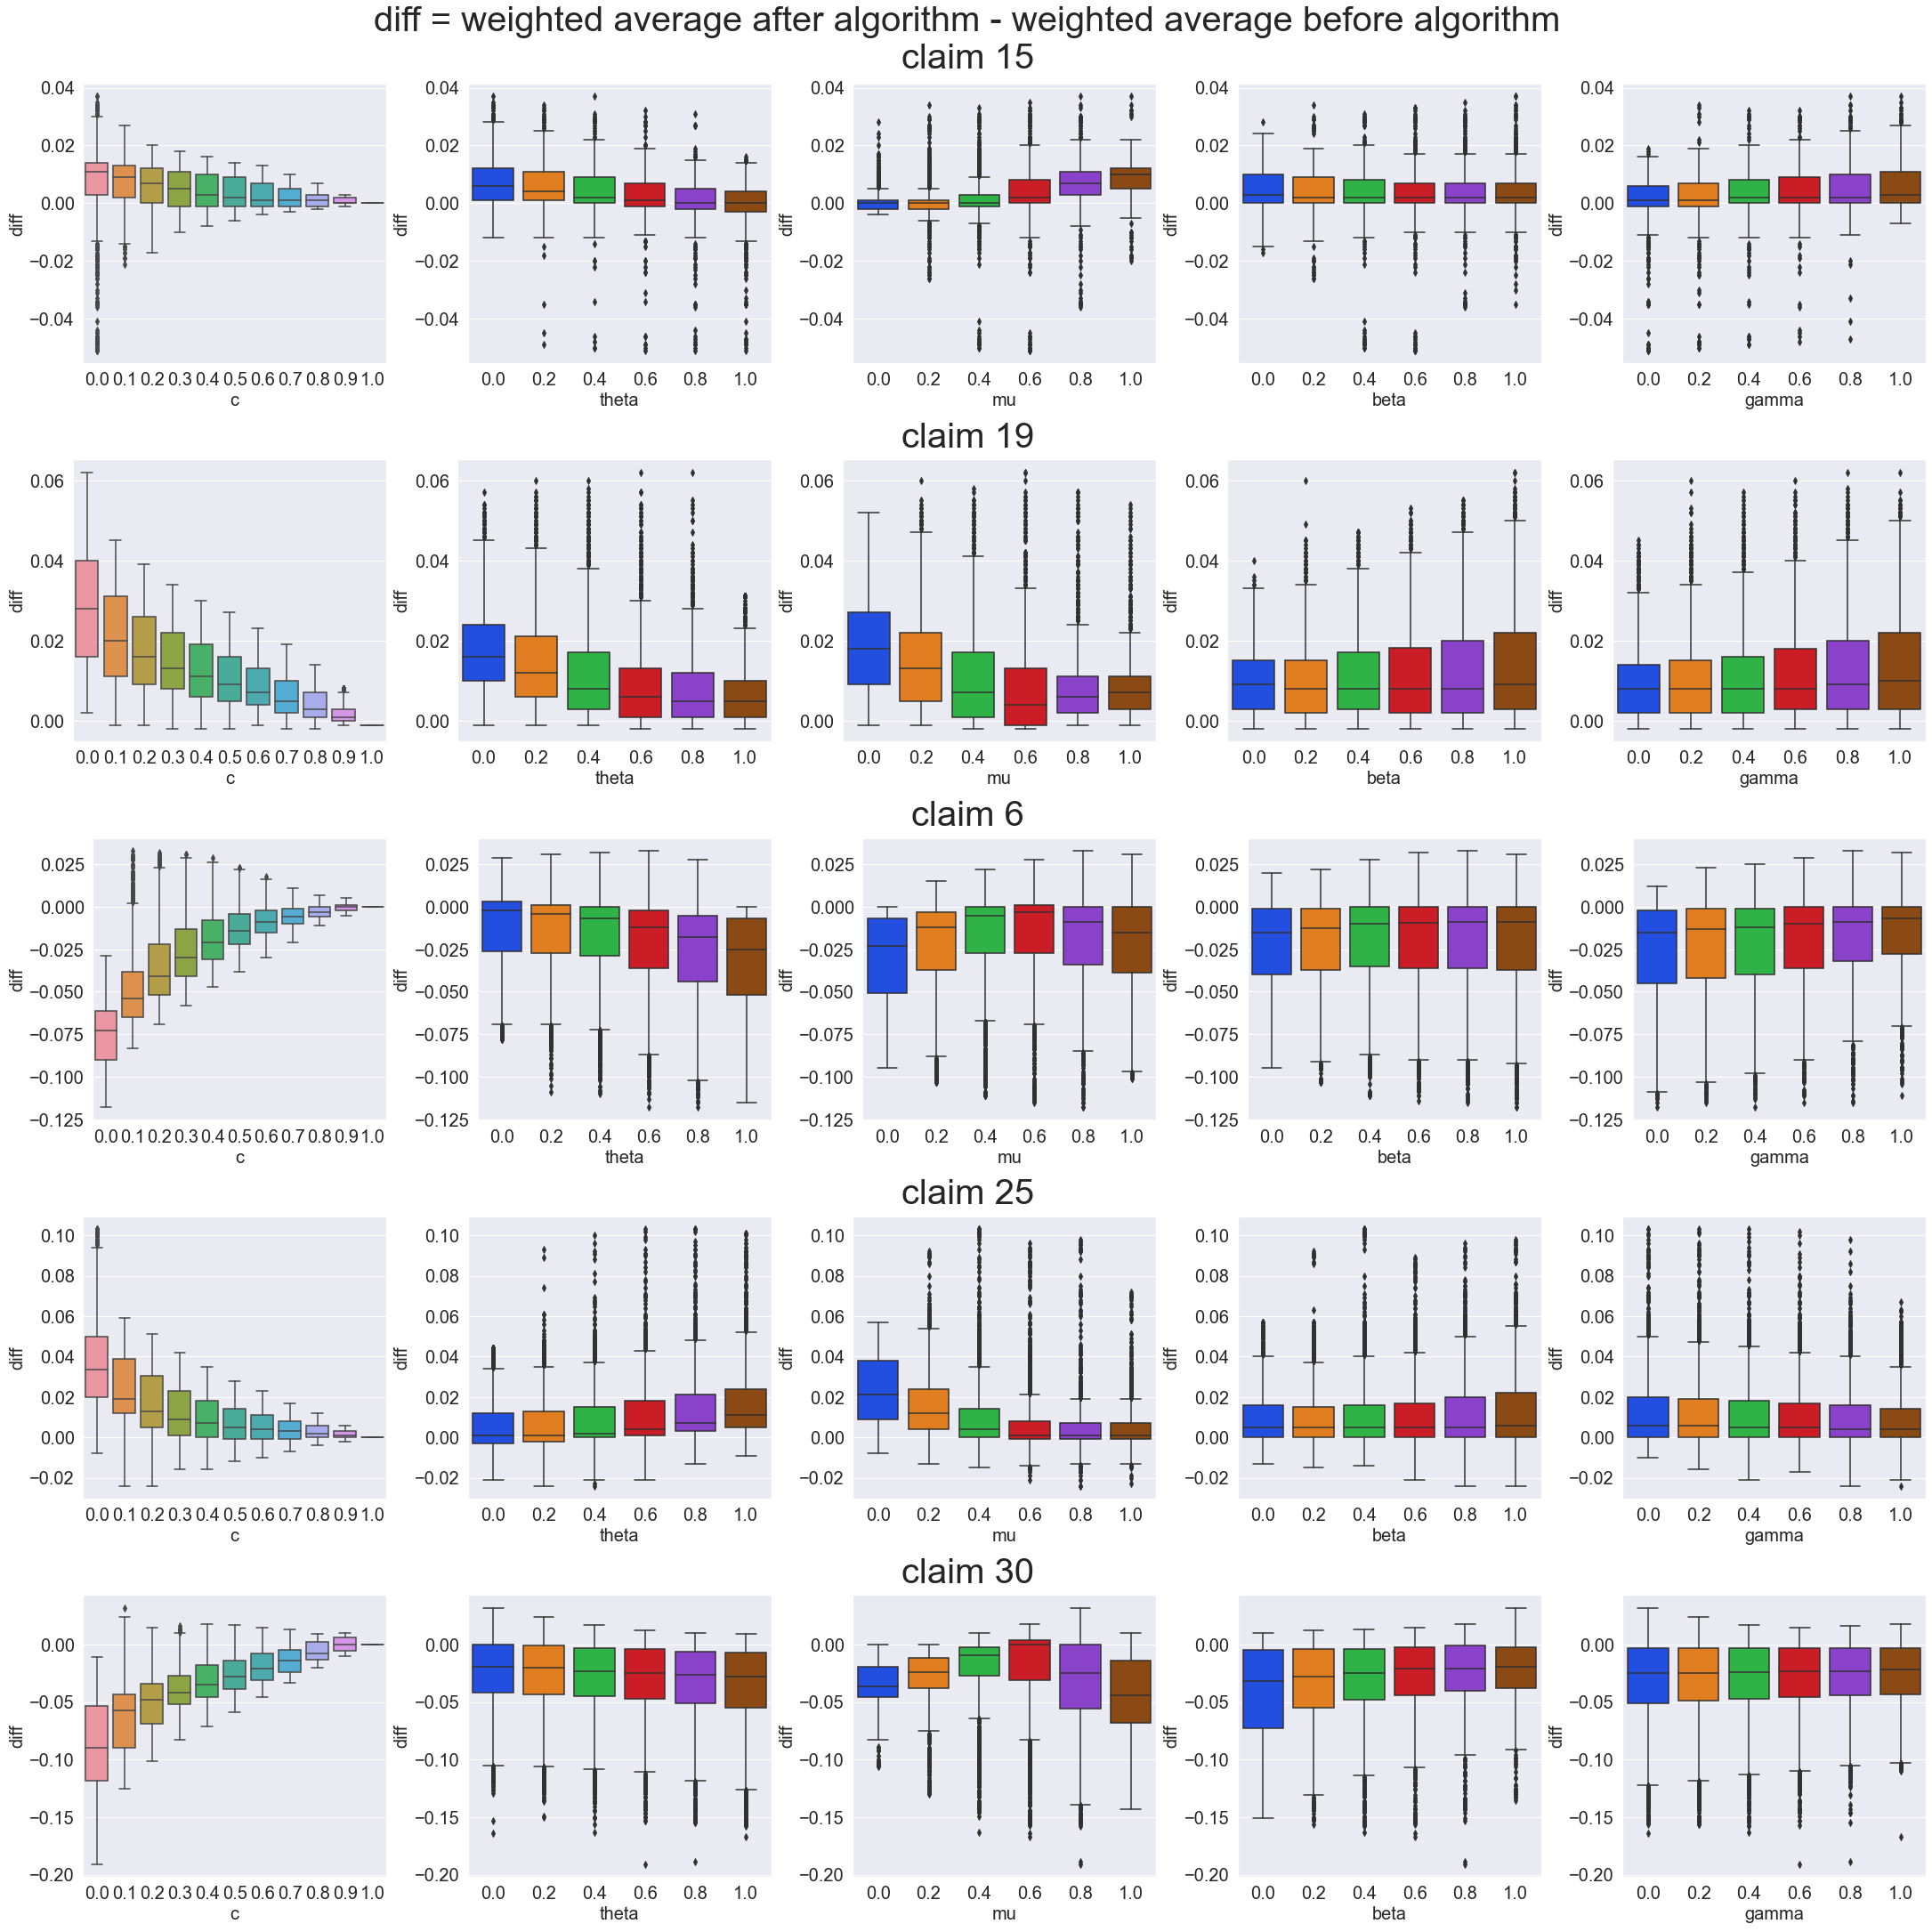

In [3]:
seed(4)

fig = plt.figure(constrained_layout=True, figsize=(30,30))
fig.suptitle("diff = weighted average after algorithm - weighted average before algorithm", fontsize=40)

cols = ["c", "theta", "mu", "beta", "gamma"]
subfigs = fig.subfigures(nrows=5, ncols=1)
for subfig in subfigs:
    claim = randrange(36)
    subfig.suptitle(f"claim {claim}", fontsize=40)

    axs = subfig.subplots(nrows=1, ncols=len(cols))
    for i,col in enumerate(cols):
        sns.boxplot(x=col, y="diff", data=df[df["claimID"] == claim], ax=axs[i])

fig.savefig(os.path.join("figures","diff_params.svg"))

In [4]:
df["prediction_m"] = (df.majority > 0).astype(int)
df["prediction_w"] = (df.weighted > 0).astype(int)
df["prediction_waa"] = (df.weightedAfterAlgorithm > 0).astype(int)
df["prediction_waa_w"] = (df.prediction_w != df.prediction_waa).astype(int)

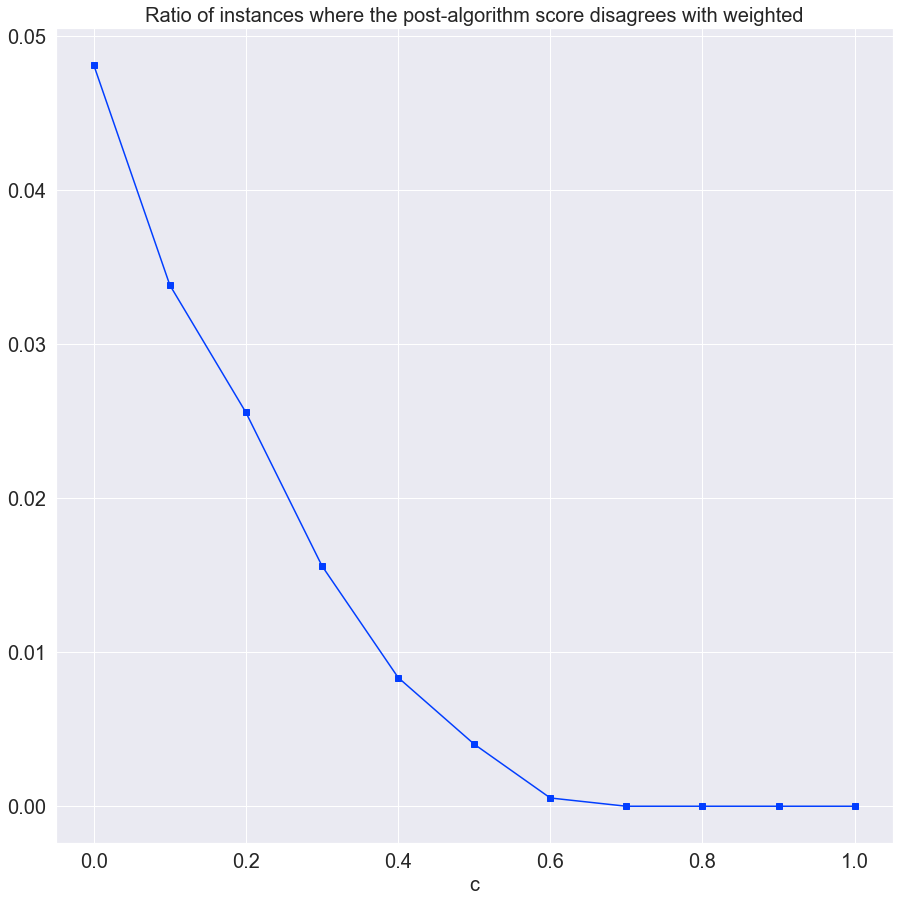

In [5]:
fig = df.groupby("c").mean()["prediction_waa_w"].plot(figsize=(15,15), title="Ratio of instances where the post-algorithm score disagrees with weighted", style="s-")
fig.axes.title.set_size(20)
fig.get_figure().savefig(os.path.join("figures","algo_disagree_weighted_c.svg"))

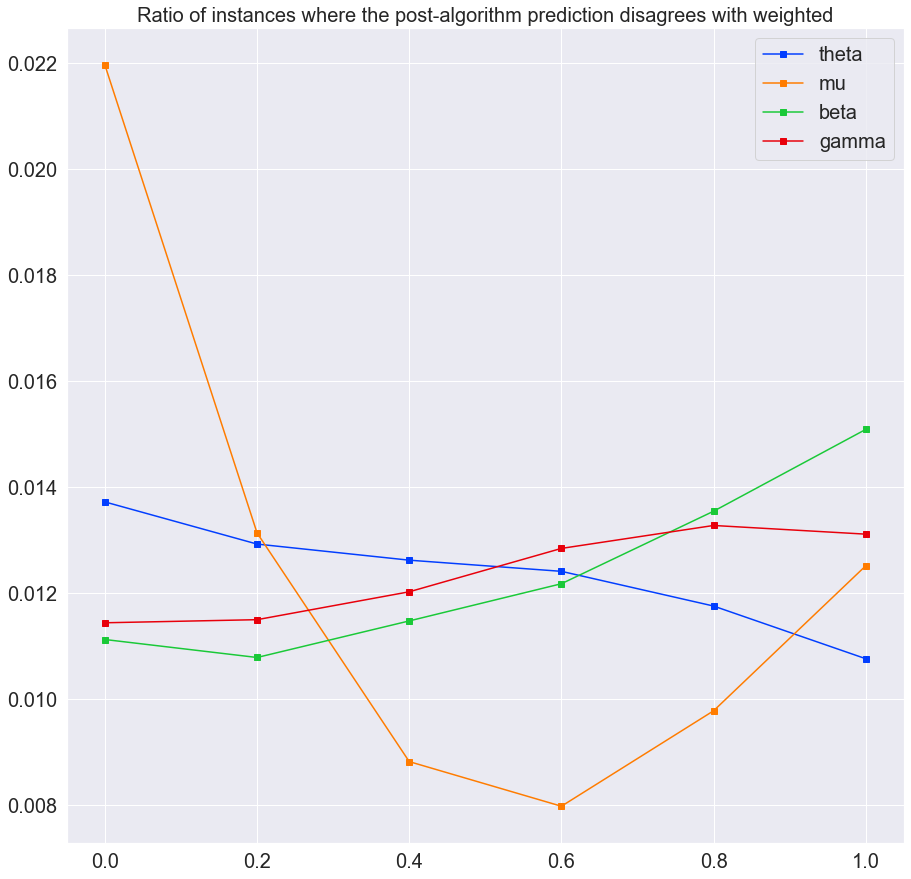

In [6]:
series = []
series.append(df.groupby("theta").mean()["prediction_waa_w"])
series.append(df.groupby("mu").mean()["prediction_waa_w"])
series.append(df.groupby("beta").mean()["prediction_waa_w"])
series.append(df.groupby("gamma").mean()["prediction_waa_w"])

pred_diff = pd.concat(series, axis=1)
pred_diff.columns = ["theta", "mu", "beta", "gamma"]
fig = pred_diff.plot(figsize=(15,15), title="Ratio of instances where the post-algorithm prediction disagrees with weighted", style="s-")
fig.axes.title.set_size(20)
fig.get_figure().savefig(os.path.join("figures","algo_disagree_weighted_tmbg.svg"))

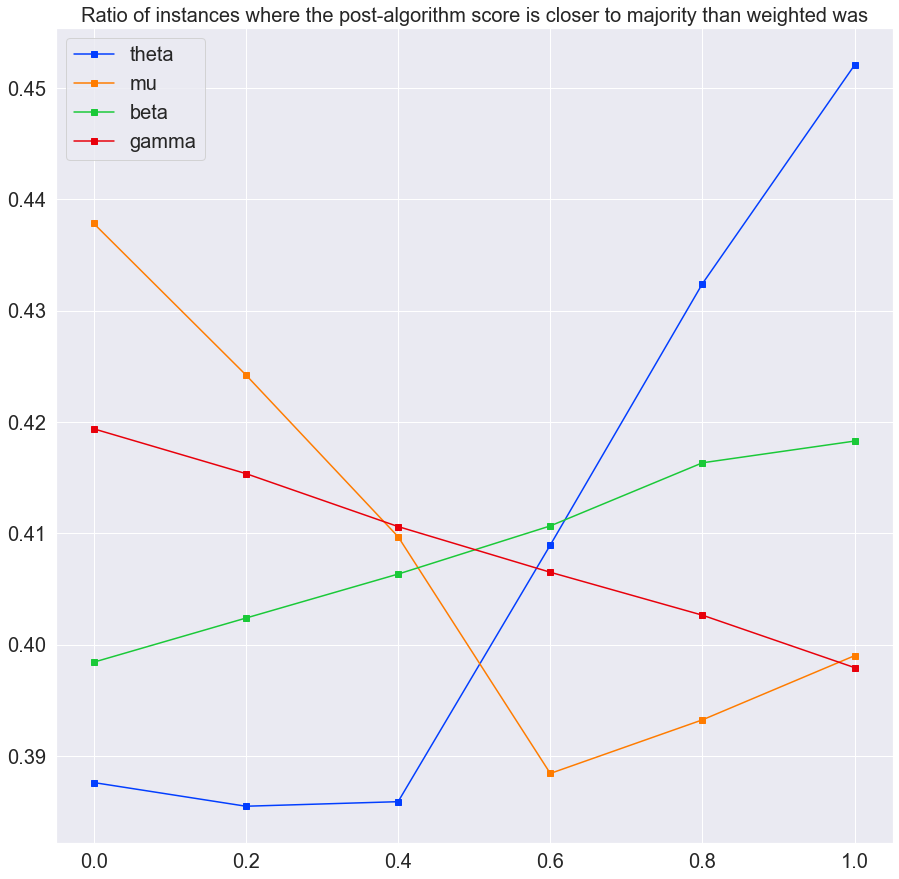

In [7]:
df["moved_towards_majority"] = (df.majority - df.weighted) > (df.majority - df.weightedAfterAlgorithm)

series = []
series.append(df.groupby("theta").mean()["moved_towards_majority"])
series.append(df.groupby("mu").mean()["moved_towards_majority"])
series.append(df.groupby("beta").mean()["moved_towards_majority"])
series.append(df.groupby("gamma").mean()["moved_towards_majority"])

pred_diff = pd.concat(series, axis=1)
pred_diff.columns = ["theta", "mu", "beta", "gamma"]
fig = pred_diff.plot(figsize=(15,15), title="Ratio of instances where the post-algorithm score is closer to majority than weighted was", style="s-")
fig.axes.title.set_size(20)
fig.get_figure().savefig(os.path.join("figures","algo_closer_majority_than_weighted_was.svg"))

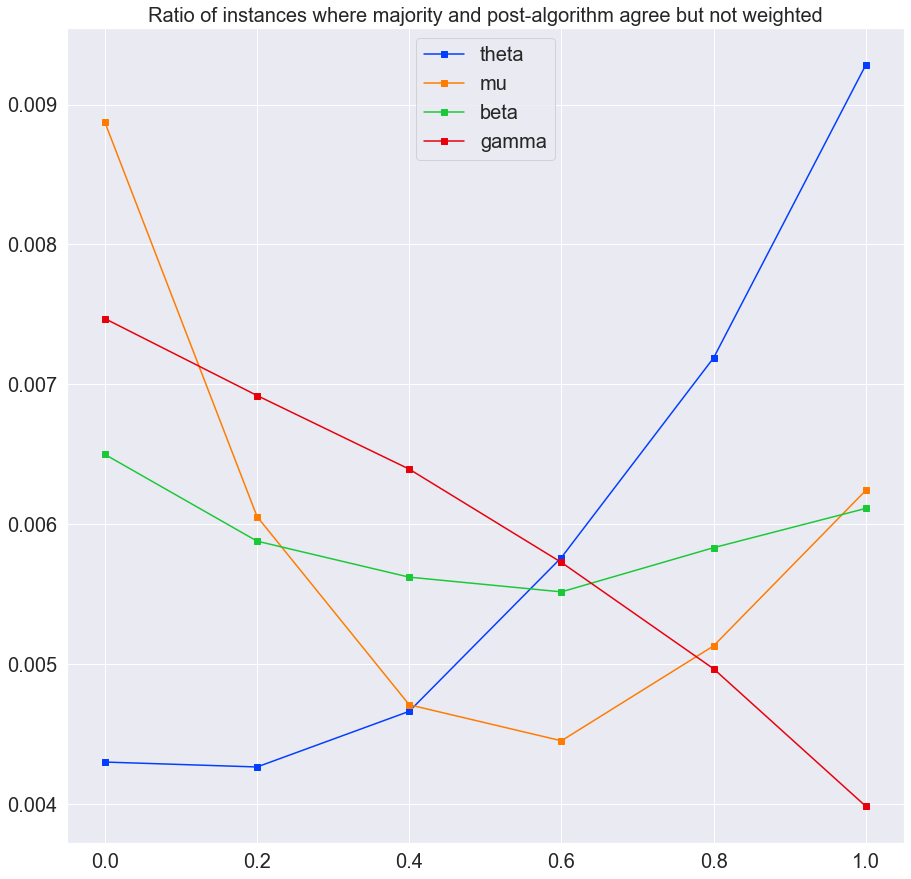

In [8]:
df["prediction_mwaa_w"] = (df.prediction_m == df.prediction_waa) & (df.prediction_w != df.prediction_waa)

series = []
series.append(df.groupby("theta").mean()["prediction_mwaa_w"])
series.append(df.groupby("mu").mean()["prediction_mwaa_w"])
series.append(df.groupby("beta").mean()["prediction_mwaa_w"])
series.append(df.groupby("gamma").mean()["prediction_mwaa_w"])

pred_diff = pd.concat(series, axis=1)
pred_diff.columns = ["theta", "mu", "beta", "gamma"]
fig = pred_diff.plot(figsize=(15,15), title="Ratio of instances where majority and post-algorithm agree but not weighted", style="s-")
fig.axes.title.set_size(20)
fig.get_figure().savefig(os.path.join("figures","algo_agree_majority_not_weighted.svg"))

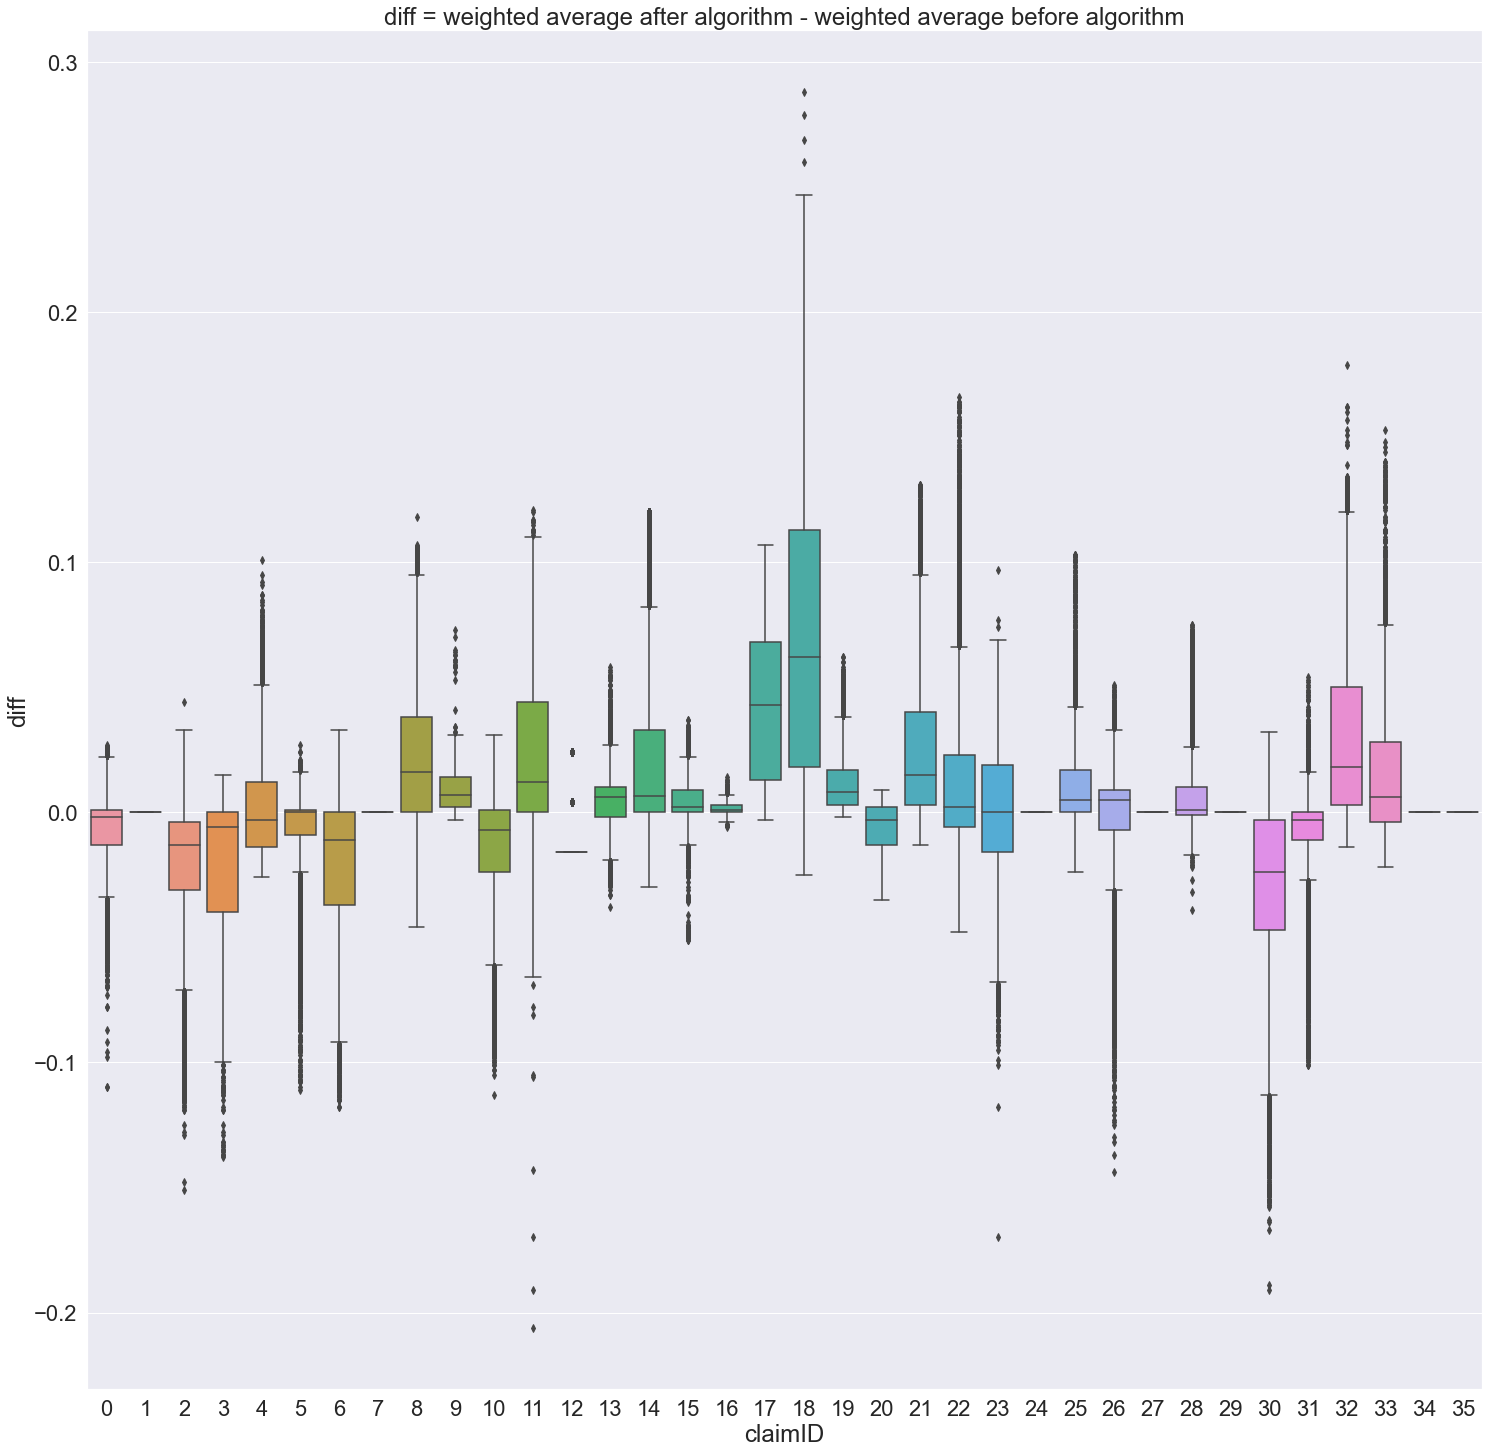

In [9]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.set(font_scale = 2)
fig = sns.boxplot(x="claimID", y="diff", data=df)
fig.set_title("diff = weighted average after algorithm - weighted average before algorithm")
fig.get_figure().savefig(os.path.join("figures","diff_claimID.svg"))